<a href="https://colab.research.google.com/github/sartansartan/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/ASartan_of_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sales = ([3505, 2400, 3027, 2798, 3700, 3250, 2689])
df = pd.DataFrame(sales, columns = ['sales'])

df

,sales
0,3505
1,2400
2,3027
3,2798
4,3700
5,3250
6,2689


In [3]:
mean = sum(sales) / len(sales)
mean

3052.714285714286

In [4]:
df['sales_dist'] = df['sales']-mean
df

,sales,sales_dist
0,3505,452.285714
1,2400,-652.714286
2,3027,-25.714286
3,2798,-254.714286
4,3700,647.285714
5,3250,197.285714
6,2689,-363.714286


In [5]:
df['sales_dist_sq'] = df['sales_dist']**2
df

,sales,sales_dist,sales_dist_sq
0,3505,452.285714,204562.367347
1,2400,-652.714286,426035.938776
2,3027,-25.714286,661.224490
3,2798,-254.714286,64879.367347
4,3700,647.285714,418978.795918
5,3250,197.285714,38921.653061
6,2689,-363.714286,132288.081633


In [6]:
n_observations = len(df)
variance = df['sales_dist_sq'].sum()/n_observations
variance

183761.06122448976

In [7]:
std = np.sqrt(variance)
std

428.67360686714756

In [0]:
def mean_variance_std(x):
  n_observations = len(x)
  mean = sum(x) / len(x)
  variance = ((x - mean)**2).sum()/n_observations
  std = np.sqrt(variance)
  return mean, variance, std

In [9]:
mean_variance_std(df['sales'])

(3052.714285714286, 183761.06122448976, 428.67360686714756)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [10]:
customers = [127, 80, 105, 92, 120, 115, 93] 
data = {'sales': sales, 'customers': customers}
df2 = pd.DataFrame(data)
df2

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [11]:
data_cov = np.cov(df2['sales'], df2['customers'], ddof=0)
df_cov = pd.DataFrame(data_cov)
df_cov

,0,1
0,183761.061224,6518.020408
1,6518.020408,249.387755


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [12]:
std_customers = mean_variance_std(df2['customers'])[2]
std_customers

15.792015549069118

In [13]:
std_sales = mean_variance_std(df2['sales'])[2]
std_sales

428.67360686714756

In [14]:
covariance = df_cov.iloc[0,1]
covariance

6518.020408163265

In [15]:
corr_coef = covariance / (std_sales * std_customers)
corr_coef

0.9628339778148909

In [16]:
df2.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


In [0]:
#Lean calculation

In [18]:
corr_coef = df_cov.iloc[0,1] / (mean_variance_std(df2['customers'])[2] * mean_variance_std(df2['sales'])[2])
corr_coef

0.9628339778148909

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [19]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
df_titanic = pd.read_csv(url) 
df_titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [20]:
df_titanic.describe(include=[np.number])

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1310.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,655.500000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,378.308736,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,328.250000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,655.500000,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,982.750000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,1310.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [0]:
df_titanic['ticket'] = pd.to_numeric(df_titanic['ticket'], errors='coerce')
df_titanic['boat'] = pd.to_numeric(df_titanic['boat'], errors='coerce')


In [22]:
df_titanic.describe(include=[np.number])

,Unnamed: 0,pclass,survived,age,sibsp,parch,ticket,fare,boat,body,has_cabin_number
count,1310.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,9.570000e+02,1308.000000,398.000000,121.000000,1310.000000
mean,655.500000,2.294882,0.381971,29.881135,0.498854,0.385027,2.490391e+05,33.295479,9.404523,160.809917,0.225191
std,378.308736,0.837836,0.486055,12.878277,1.041658,0.865560,4.426853e+05,51.758668,4.357417,97.696922,0.417867
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,6.800000e+02,0.000000,1.000000,1.000000,0.000000
25%,328.250000,2.000000,0.000000,22.000000,0.000000,0.000000,1.995000e+04,7.895800,5.000000,72.000000,0.000000
50%,655.500000,3.000000,0.000000,29.881135,0.000000,0.000000,2.346040e+05,14.454200,10.000000,155.000000,0.000000
75%,982.750000,3.000000,1.000000,35.000000,1.000000,0.000000,3.474680e+05,31.275000,13.000000,256.000000,0.000000
max,1310.000000,3.000000,1.000000,80.000000,8.000000,9.000000,3.101298e+06,512.329200,16.000000,328.000000,1.000000


In [23]:
df_titanic_num = df_titanic[['pclass', 'survived', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'boat', 'body', 'has_cabin_number']].copy()
df_titanic_num.head()

,pclass,survived,age,sibsp,parch,ticket,fare,boat,body,has_cabin_number
0,1.0,1.0,29.0000,0.0,0.0,24160.0,211.3375,2.0,NaN,1
1,1.0,1.0,0.9167,1.0,2.0,113781.0,151.5500,11.0,NaN,1
2,1.0,0.0,2.0000,1.0,2.0,113781.0,151.5500,NaN,NaN,1
3,1.0,0.0,30.0000,1.0,2.0,113781.0,151.5500,NaN,135.0,1
4,1.0,0.0,25.0000,1.0,2.0,113781.0,151.5500,NaN,NaN,1


In [24]:
df_titanic_num.cov()

,pclass,survived,age,sibsp,parch,ticket,fare,boat,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,1.035322e+05,-2.422779e+01,2.586199,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,-2.492371e+04,6.146023e+00,-0.018113,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,-8.417623e+05,1.144166e+02,-16.593793,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,7.643951e+04,8.641768e+00,-0.209676,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,2.043954e+04,9.928031e+00,-0.129242,4.237190,0.013316
ticket,103532.249490,-24923.710972,-841762.328231,76439.510606,20439.544325,1.959703e+11,-2.518936e+06,492039.216920,-142930.213847,-37644.511384
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,-2.518936e+06,2.678960e+03,-153.291880,-179.164684,10.976961
boat,2.586199,-0.018113,-16.593793,-0.209676,-0.129242,4.920392e+05,-1.532919e+02,18.987083,NaN,-1.177778
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-1.429302e+05,-1.791647e+02,NaN,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,-3.764451e+04,1.097696e+01,-1.177778,3.625689,0.174613


In [25]:
df_titanic_num.corr()

,pclass,survived,age,sibsp,parch,ticket,fare,boat,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,0.280915,-0.558629,0.711395,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,-0.115973,0.244265,-0.058714,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,-0.148586,0.171892,-0.269758,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.205526,0.160238,-0.072461,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.060384,0.221539,-0.037118,0.051099,0.036806
ticket,0.280915,-0.115973,-0.148586,0.205526,0.060384,1.000000,-0.150129,0.332834,-0.002558,-0.205013
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,-0.150129,1.000000,-0.473101,-0.043110,0.507253
boat,0.711395,-0.058714,-0.269758,-0.072461,-0.037118,0.332834,-0.473101,1.000000,NaN,-0.544945
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.002558,-0.043110,NaN,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,-0.205013,0.507253,-0.544945,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

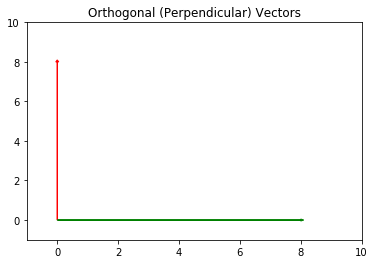

In [26]:
#The synonym is perpendicular

vector_1 = [0, 8]
vector_2 = [8, 0]

# Plot the Scaled Vectors
plt.arrow(0, 0, vector_1[0], vector_1[1],head_width=0.1, head_length=0.1, color ='red')
plt.arrow(0, 0, vector_2[0], vector_2[1],head_width=.1, head_length=0.1, color ='green')
plt.xlim(-1,10)          
plt.ylim(-1,10)
plt.title("Orthogonal (Perpendicular) Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [27]:
vector_1 = [-5, 3, 7]
vector_2 = [6, -8, 2]

np.dot(vector_1, vector_2)

-40

In [0]:
#These vectors are not orthogonal because their dot product is not zero

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
from numpy import linalg as LA

c = np.array([2, -15, 6, 20])

In [30]:
(LA.norm(c))**2

665.0

In [31]:
np.dot(c, c)

665

In [32]:
np.transpose(c) * c

array([  4, 225,  36, 400])

In [33]:
(np.transpose(c) * c).sum()

665

In [0]:
#Norm of the vector is the square root of the sum of the squared elements of a vector.
#Dot product is a scalar quantity that is equal to the sum of pair-wise products of the components of vectors a and b.
#Which becomes the same when we calculate a dot product of two identical vectors.
#The sum of a vector elements ultiplied by the identical or transposed vector elements is the same as squared elements of a vector. 
#So it equals to a norm of a vector squared two.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}



Writing d + e as a linear combination of scalars and unit vectors

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\-8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\0\end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\0 \end{bmatrix} -8\begin{bmatrix} 0 \\ 0 \\1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}




## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4, 12, 11, 9, 2])

In [0]:
f_norm = LA.norm(f)

In [37]:
f_hat = f / f_norm
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [38]:
vector = [2, 1, 3]

vector2_dep = np.multiply(3, vector)
vector3_dep = np.multiply(-1, vector)
vector4_ind = vector + vector2_dep
vector5_ind = vector2_dep + vector4_ind

print (vector2_dep)
print (vector3_dep)
print (vector4_ind)
print (vector5_ind)

[6 3 9]
[-2 -1 -3]
[ 8  4 12]
[14  7 21]


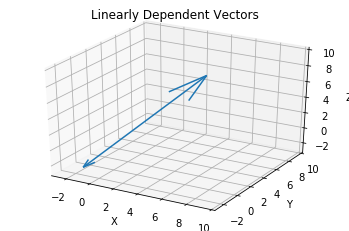

In [39]:
from mpl_toolkits.mplot3d import Axes3D

three_d_v = np.array([[0, 0, 0, 6, 3, 9],
                    [0,0,0,-2,-1,-3],
                    ])

X, Y, Z, U, V, W = zip(*three_d_v)

fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([-3, 10])
ax.set_ylim([-3, 10])
ax.set_zlim([-3, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("Linearly Dependent Vectors")
plt.show()

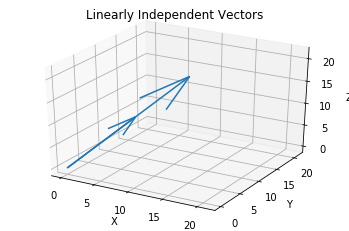

In [40]:
from mpl_toolkits.mplot3d import Axes3D

three_d_v = np.array([[0, 0, 0, 8, 4, 12],
                    [0, 0, 0, 14, 7, 21]])

X, Y, Z, U, V, W = zip(*three_d_v)

fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([-1, 22])
ax.set_ylim([-1, 22])
ax.set_zlim([-1, 22])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

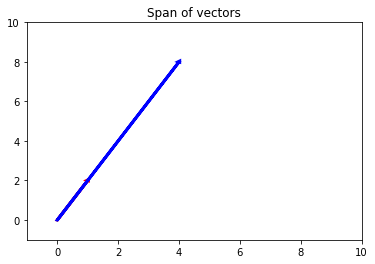

In [41]:
g = [1, 2]
h = [4, 8]

plt.xlim(-1,10)          
plt.ylim(-1,10)

plt.arrow(0, 0, g[0], g[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, h[0], h[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.title("Span of vectors")
plt.show()

In [0]:
# Since these vectors are linear dependant - the span could be just those two vectors or a whole set 

In [43]:
np.linalg.matrix_rank(g)

1

In [44]:
np.linalg.matrix_rank(h)

1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

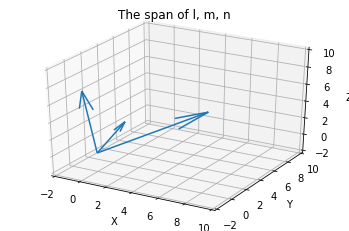

In [45]:
three_d_v = np.array([[0, 0, 0, 1, 2, 3],
                    [0, 0, 0, -1, 0, 7],
                    [0, 0, 0, 4, 8, 2]])

X, Y, Z, U, V, W = zip(*three_d_v)

fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([-2, 10])
ax.set_ylim([-2, 10])
ax.set_zlim([-2, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("The span of l, m, n")
plt.show()

In [46]:
lmn = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])
np.linalg.matrix_rank(lmn)

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



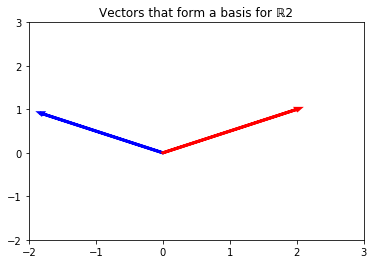

In [47]:
plt.xlim(-2, 3)          
plt.ylim(-2, 3)

# Original Vector
a = [-1.8, .9] 
b = [2, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Vectors that form a basis for ℝ2")
plt.show()

## 6.2 What does it mean to form a basis?



```
Plot a set of vectors that are linearly independent and that span the vector space
```



# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [48]:
p = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])
p

array([[ 1,  2,  3],
       [-1,  0,  7],
       [ 4,  8,  2]])

In [49]:
np.linalg.matrix_rank(p)

3

## 7.2 What does the rank of a matrix tell us?

*It finds the dimension of the vector space spanned by its columns by getting rid of redundancy within the rows/columns of a matrix.*

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


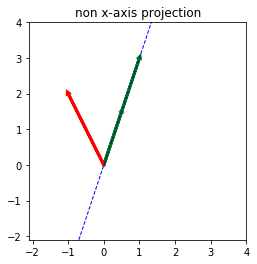

In [50]:
# Axis Bounds
plt.xlim(-2.1,4)          
plt.ylim(-2.1,4)

# Original Vector
v = np.array([1, 3])
w = np.array([-1, 2])
c = np.dot(v, w)/np.dot(v, v)
proj = c*v

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("non x-axis projection")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

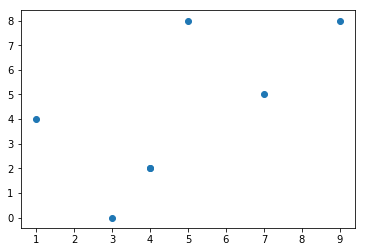

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()

In [71]:
df_stretch = df.T
df_stretch.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7']
df_stretch.head()

,A1,A2,A3,A4,A5,A6,A7
x,1,4,7,3,9,4,5
y,4,2,5,0,8,2,8


In [0]:
def linear_proj (x, y):
  a = np.array([10, 10])
  b = np.array([x, y])
  c = np.dot(a, b)/np.dot(a, a)
  proj = c*a
  x_minus_proj = b-proj
  return proj, x_minus_proj

In [0]:
columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7']

In [0]:
proj_list = []
x_minus_list = []
for col in columns:
  proj, x_minus_proj = linear_proj(df_stretch[col][0], df_stretch[col][1])
  proj_list.append(proj)
  x_minus_list.append(x_minus_proj)

In [0]:
df_stretch_proj = pd.DataFrame(data=proj_list, index = columns, columns = ['X_proj', 'Y_proj'])
df_min_proj = pd.DataFrame(data=x_minus_list, index = columns, columns = ['X_min_proj', 'Y_min_proj'])


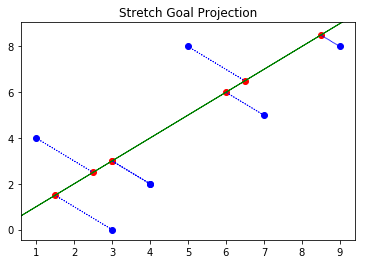

In [73]:
plt.scatter(df.x, df.y, color = 'blue')
plt.scatter(df_stretch_proj.X_proj, df_stretch_proj.Y_proj, color = 'red')

line = np.array([10, 10])


plt.arrow(df_stretch_proj['X_proj'][0], df_stretch_proj['Y_proj'][0],  df_min_proj['X_min_proj'][0], df_min_proj['Y_min_proj'][0], ls = ':', color='b', linewidth=1)
plt.arrow(df_stretch_proj['X_proj'][1], df_stretch_proj['Y_proj'][1],  df_min_proj['X_min_proj'][1], df_min_proj['Y_min_proj'][1], ls = ':', color='b', linewidth=1)
plt.arrow(df_stretch_proj['X_proj'][2], df_stretch_proj['Y_proj'][2],  df_min_proj['X_min_proj'][2], df_min_proj['Y_min_proj'][2], ls = ':', color='b', linewidth=1)
plt.arrow(df_stretch_proj['X_proj'][3], df_stretch_proj['Y_proj'][3],  df_min_proj['X_min_proj'][3], df_min_proj['Y_min_proj'][3], ls = ':', color='b', linewidth=1)
plt.arrow(df_stretch_proj['X_proj'][4], df_stretch_proj['Y_proj'][4],  df_min_proj['X_min_proj'][4], df_min_proj['Y_min_proj'][4], ls = ':', color='b', linewidth=1)
plt.arrow(df_stretch_proj['X_proj'][5], df_stretch_proj['Y_proj'][5],  df_min_proj['X_min_proj'][5], df_min_proj['Y_min_proj'][5], ls = ':', color='b', linewidth=1)
plt.arrow(df_stretch_proj['X_proj'][6], df_stretch_proj['Y_proj'][6],  df_min_proj['X_min_proj'][6], df_min_proj['Y_min_proj'][6], ls = ':', color='b', linewidth=1)
plt.arrow(0, 0,  line[0], line[1], linewidth=1, head_width=.01, head_length=0.05, color ='green')

plt.title("Stretch Goal Projection")

plt.show()